

---


  

> # **군AI교육지원사업**
**자연어 처리**



---

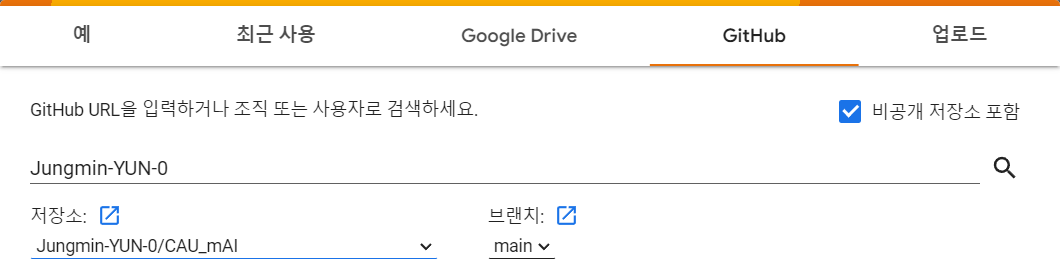

##WEEK 2
=========
### 1. Assigment (week1)

### 2. Word Embedding
>2-1. Sparse vs Dense
>
>2-2. Word2Vec
>
> ** Assignment(week2)

## 1. Assignment(week1)

**[문제] 'low', 'lower', 'newest', 'widest'에 대하여 BPE를 사용해서 단어집합을 구성하였다. 이때 새로 등장한 단어 'lowest'에 대하여 토큰화를 수행해보자.**

**[Hint]**

1.   lowest를 글자 단위로 분해 → l, o, w, e, s, t
2.   앞서 업데이트된 단어집합을 사용해서 pair를 통합
(이때, 통합을 위한 우선순위는 bpe_codes를 사용(value값이 작을수록 대응하는 key의 우선순위가 높음))

In [ ]:
bpe_codes = {('e', 's'): 0,
             ('es', 't'): 1,
             ('l', 'o'): 2,
             ('lo', 'w'): 3,
             ('n', 'e'): 4,
             ('ne', 'w'): 5,
             ('new', 'est'): 6,
             ('w', 'i'): 7,
             ('wi', 'd'): 8,
             ('wid', 'est'): 9}

In [ ]:
def get_pairs(word):                 # input: "lowest"

    pairs = set()
    prev_char = word[0]              # l

    for char in word[1:]:            #[owest]
        pairs.add((prev_char, char)) #('l', 'o')  ##('o', 'w')
        prev_char = char             # o          ## w
    return pairs                     #final: {('e', 's'), ('l', 'o'), ('o', 'w'), ('s', 't'), ('w', 'e')}

In [ ]:
from IPython.display import display, Markdown, Latex

def encode(orig):

    word = tuple(orig)    # lowest → (l,o,w,e,s,t)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)    # make unigram pairs of the word {('e', 's'), ('l', 'o'), ('o', 'w'), ('s', 't'), ('w', 'e')}

    if not pairs:    # 예를 들어, 'l'이 input으로 들어온 경우 pairs가 빈 집합을 반환 (빈 시퀀스 = False)
        return orig
        
    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))    # bpe_codes.get(pair, float('inf)): bpe_codes에서, pair에 대한 value 값. 딕셔너리에 존재하지 않는 pair면, value값으로 float('inf')를 반환.
        print("candidate for merging: {}".format(bigram))                                # bigram=('e', 's')                                 ## bigram=('es', 't')                ### bigram=('l','o')               #### bigram=('lo','w')

        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break

        first, second = bigram                                                           # first='e', second='s'                             ## first='es', second='t'     
        new_word = []
        i = 0
        while i < len(word):                                                             # len(word)=6                                       ## len(word)=5                                                                         
            try: 
                j = word.index(first, i)    # i번째 위치부터 처음 first가 위치한 자리    # j=3                                               ## j=3                         
                new_word.extend(word[i:j])                                               # new_word=['l', 'o', 'w']                          ## new_word=['l', 'o', 'w']                                              
                i = j             
            except:
                new_word.extend(word[i:])                                                #    new_word=['l', 'o', 'w', 'es', 't']            ##           
                break
            try:
                if word[i] == first and word[i+1] == second and i < len(word)-1:
                    new_word.append(first+second)                                        # new_word=['l', 'o', 'w', 'es']                    ## new_words=['l', 'o', 'w', 'est']
                    i += 2                                                               # i=5                                               ## i=5                             
            except:    # lowest의 경우는 문제x, loweste의 경우는 문제o
                new_word.append(word[i])
                break

        new_word = tuple(new_word)                                                       # new_word=('l', 'o', 'w', 'es', 't')               ## new_word=('l', 'o', 'w', 'est') 
        word = new_word                                                                  # word=('l', 'o', 'w', 'es', 't')                   ## word=('l', 'o', 'w', 'est')     

        print("word after merging: {}".format(word))
        if len(word) == 1:    # merging을 반복해서, 초기 input과 같은 형태가 된 경우(더 이상 merge 할게 없는 경우)
            break
        else:
            pairs = get_pairs(word)                                                      # {('es', 't'),('l', 'o'),('o', 'w'),('w', 'es')}   ## {('l','o'), ('o','w'), ('w','est')}

    return word

In [ ]:
encode("lowest")   # iteration별 출력 예시 

# 2. Word Embedding

## 2-1. Sparse vs Dense

**[Limitation of Sparse Representaion]**

* 단어의 개수가 늘어날수록, 벡터의 차원이 증가

* 단어의 유사도 표현 불가

**[Example of Sparse Represenation: One-Hot Encoding]**

* 표현 대상 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식

* 표현된 벡터**(One-Hot Vector)**의 차원 = 단어 집합(vocabulary)의 크기

In [ ]:
import torch

In [ ]:
# One-Hot Vector 생성

def one_hot(vocab):
  encoding_matrix = torch.zeros(len(vocab), len(vocab))    # vocabulary의 차원만큼 원소 0을 갖는 텐서 만들기
  for index, word in enumerate(vocab):
    encoding_matrix[index,index] = 1
  return encoding_matrix

vocabulary = ['cat','dog','computer','netbook']
one_hot_encoding = one_hot(vocabulary)
one_hot_encoding

In [ ]:
dog = one_hot_encoding[:, 0]
cat = one_hot_encoding[:, 1]
computer = one_hot_encoding[:, 2]
netbook = one_hot_encoding[:, 3]

print('dog: ', dog) #label, encoding pair
print('cat: ', cat)
print('computer: ', computer)
print('netbook: ', netbook)

In [ ]:
print(torch.cosine_similarity(cat, dog, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))

<img src = "https://d33wubrfki0l68.cloudfront.net/43d0db23e9f1bfed7a3f34acbf1abacc7f831309/a72c9/images/nlp-embedding-methods-2.jpg" height = 300 width = 540>

## 2-2. Word2Vec

### CBOW

In [1]:
## using pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

<img src = "https://upload.wikimedia.org/wikipedia/commons/a/a2/Cbow.png" height = 420 width = 360>

In [28]:
## CBOW 모델 정의

embedding_dim = 128
embedding_max_norm = 1   # Embedding Layer의 weight가 너무 커지지 않도록 제한

class CBOW(nn.Module):
    def __init__(self, vocab_size: int, embedding_dim):
        
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, embedding_max_norm)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, input):         # input.shape: [4]
        x = self.embeddings(input)    # [4,128] (=[4,48]x[48,128])
        x = sum(x)                    # [128]                          # sum or mean(v=(sum of context_vectors)/number of context_size))
        x = x.view(1,-1)              # [1, 128]
        x = self.linear(x)            # [1, 48] (=[1,128]x[128,48])
        x = F.softmax(x, dim=-1)      # [1, 48]
        return x

In [14]:
example_sentence = "In the case of CBOW, one word is eliminated, and the word is predicted from surrounding words. Therefore, it takes multiple input vectors as inputs to the model and creates one output vector. In contrast, Skip-Gram learns by removing all words except one word and predicting the surrounding words in the context through one word. So, it takes a vector as input and produces multiple output vectors. CBOW and Skip-Gram are different."

In [15]:
## Data Preprocessing

# Tokenization (just split)
tokenized_sentence = example_sentence.split()

# Make Vocabulary
vocab = set(tokenized_sentence)    # 중복제거

In [16]:
vocab

{'CBOW',
 'CBOW,',
 'In',
 'Skip-Gram',
 'So,',
 'Therefore,',
 'a',
 'all',
 'and',
 'are',
 'as',
 'by',
 'case',
 'context',
 'contrast,',
 'creates',
 'different.',
 'eliminated,',
 'except',
 'from',
 'in',
 'input',
 'inputs',
 'is',
 'it',
 'learns',
 'model',
 'multiple',
 'of',
 'one',
 'output',
 'predicted',
 'predicting',
 'produces',
 'removing',
 'surrounding',
 'takes',
 'the',
 'through',
 'to',
 'vector',
 'vector.',
 'vectors',
 'vectors.',
 'word',
 'word.',
 'words',
 'words.'}

In [17]:
## Make Dictionary _ word2index{word: index}, index2word{index: word}

word2index = {word:index for index, word in enumerate(vocab)}
index2word = {index:word for index, word in enumerate(vocab)}

import itertools
print(dict(itertools.islice(word2index.items(),10)))
print(dict(itertools.islice(index2word.items(),10)))

{'Skip-Gram': 0, 'Therefore,': 1, 'So,': 2, 'words': 3, 'through': 4, 'vectors.': 5, 'CBOW,': 6, 'from': 7, 'output': 8, 'word.': 9}
{0: 'Skip-Gram', 1: 'Therefore,', 2: 'So,', 3: 'words', 4: 'through', 5: 'vectors.', 6: 'CBOW,', 7: 'from', 8: 'output', 9: 'word.'}


In [18]:
## Make Dataset

def make_data(tokenized_sentence):
  data = []
  for i in range(2, len(tokenized_sentence) - 2):    #context_size=4
    input = [tokenized_sentence[i - 2], tokenized_sentence[i - 1], 
            tokenized_sentence[i + 1], tokenized_sentence[i + 2]]   # context 범위 설정(window size = 2)
    target = tokenized_sentence[i]    # target 지정
    data.append((input, target))
  return data

In [19]:
data = make_data(example_sentence.split())
print("input: ", data[0][0])
print("target: ", data[0][1])

input:  ['In', 'the', 'of', 'CBOW,']
target:  case


In [20]:
## Convert Context to Index Vector
def make_index_vector(context, word_to_ix):
  idxs = [word_to_ix[w] for w in context]
  return torch.tensor(idxs, dtype=torch.long)

In [21]:
print(make_index_vector(data[0][0], word2index ))
print(make_index_vector([data[0][1]], word2index ))

tensor([32, 33, 37,  6])
tensor([46])


In [22]:
len(vocab)

48

In [29]:
## Train

model = CBOW(len(vocab), embedding_dim)    # 모델 선언
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS=1000

#input_, target_ = make_data(example_sentence.split())  
#input = torch.LongTensor(input_)
#target = torch.LongTensor(target_)

for epoch in range(EPOCHS):
    total_loss = 0
    for input, target in data:
        input_ = make_index_vector(input, word2index)
        output = model(input_)
        total_loss += loss_function(output, torch.tensor([word2index[target]]))
    if epoch % 50 == 0:
      print('epoch = ',epoch, ', loss = ',total_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

torch.Size([4])
torch.Size([4, 128])


TypeError: mean() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [12]:
## Test

test_data = ['CBOW','and','are','different.']
test_vector = make_index_vector(test_data, word2index)
result = model(test_vector)
print('Prediction : ', index2word[torch.argmax(result[0]).item()])

Prediction :  Skip-Gram


In [13]:
### Embedding 결과

target_word='CBOW'

embeddings = model.embeddings.weight.data
word_embedding = embeddings[word2index[target_word]]    #128D

distances = []
for word, index in word2index.items():
    if word == target_word:    # target_word(대상 word) 제외
        continue
    distances.append((word, torch.dist(word_embedding, embeddings[index])))
n=100
results = sorted(distances, key=lambda x: x[1])[1:n+2]
results

[('surrounding', tensor(14.2708)),
 ('produces', tensor(14.4822)),
 ('removing', tensor(14.8063)),
 ('context', tensor(14.9144)),
 ('predicted', tensor(15.0143)),
 ('it', tensor(15.0501)),
 ('the', tensor(15.1066)),
 ('case', tensor(15.2711)),
 ('model', tensor(15.4555)),
 ('Skip-Gram', tensor(15.4875)),
 ('vectors.', tensor(15.5106)),
 ('inputs', tensor(15.5268)),
 ('creates', tensor(15.5846)),
 ('of', tensor(15.6360)),
 ('So,', tensor(15.6471)),
 ('CBOW,', tensor(15.6533)),
 ('predicting', tensor(15.7349)),
 ('output', tensor(15.8399)),
 ('multiple', tensor(15.8705)),
 ('In', tensor(15.9691)),
 ('Therefore,', tensor(15.9850)),
 ('is', tensor(16.0696)),
 ('vectors', tensor(16.2239)),
 ('from', tensor(16.2637)),
 ('word.', tensor(16.3778)),
 ('words', tensor(16.3795)),
 ('contrast,', tensor(16.4713)),
 ('are', tensor(16.4782)),
 ('as', tensor(16.4849)),
 ('by', tensor(16.5144)),
 ('vector', tensor(16.6569)),
 ('learns', tensor(16.6794)),
 ('vector.', tensor(16.6831)),
 ('all', tensor(1

## **Assignment(week2)

**[과제]**

### Skip-Gram 구현하기

**[HINT]**
- 자유롭게 코드 구현 가능(하이퍼파라미터, 모델 세부 구조 등 전부 자유)
- 아래의 가이드라인 코드를 참고해서, 빈칸('''CODE''' 부분)만 채워도 상관없음

### Skip-Gram

<img src = "https://upload.wikimedia.org/wikipedia/commons/9/95/Skip-gram.png" height = 420 width = 360>

In [ ]:
'''
자유롭게 코드 작성
'''

**[참고용 가이드라인]**

In [ ]:
## using pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
## Skip-Gram 모델 정의
import torch
import torch.nn as nn
import torch.nn.functional as F

embedding_dim = 128
embedding_max_norm = 1   # Embedding Layer의 weight가 너무 커지지 않도록 제한

class SkipGram(nn.Module):
    def __init__(self, embedding_dim, vocab_size: int, context_size=4):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, embedding_max_norm)
        self.linear = nn.Linear(embedding_dim, (context_size, vocab_size))

    def forward(self, input):
        x = self.embeddings(input)  
        x = self.linear(x)           
        x = F.softmax(x)
        return x

In [17]:
example_sentence = "In the case of CBOW, one word is eliminated, and the word is predicted from surrounding words. Therefore, it takes multiple input vectors as inputs to the model and creates one output vector. In contrast, Skip-Gram learns by removing all words except one word and predicting the surrounding words in the context through one word.  So, it takes a vector as input and produces multiple output vectors. CBOW and Skip-Gram are different." 
#-----------------------------------------------------------------------
## Data Preprocessing

# Tokenization (just split)
tokenized_sentence = example_sentence.split()

# Make Vocabulary
vocab = set(tokenized_sentence)    # 중복제거
#-----------------------------------------------------------------------
## Make Dictionary _ word2index{word: index}, index2word{index: word}

word2index = {word:index for index, word in enumerate(vocab)}
index2word = {index:word for index, word in enumerate(vocab)}
#-----------------------------------------------------------------------

In [18]:
vocab

{'CBOW',
 'CBOW,',
 'In',
 'Skip-Gram',
 'So,',
 'Therefore,',
 'a',
 'all',
 'and',
 'are',
 'as',
 'by',
 'case',
 'context',
 'contrast,',
 'creates',
 'different.',
 'eliminated,',
 'except',
 'from',
 'in',
 'input',
 'inputs',
 'is',
 'it',
 'learns',
 'model',
 'multiple',
 'of',
 'one',
 'output',
 'predicted',
 'predicting',
 'produces',
 'removing',
 'surrounding',
 'takes',
 'the',
 'through',
 'to',
 'vector',
 'vector.',
 'vectors',
 'vectors.',
 'word',
 'word.',
 'words',
 'words.'}

In [19]:
## Make Dataset

def make_data(tokenized_sentence):
  data = []
  for i in range(2, len(tokenized_sentence) - 2):    #context_size=4
    input = [tokenized_sentence[i - 2], tokenized_sentence[i - 1], 
            tokenized_sentence[i + 1], tokenized_sentence[i + 2]]   # context 범위 설정(window size = 2)
    target = tokenized_sentence[i]    # target 지정
    data.append((input, target))
  return data

In [ ]:
def make_data(sentence):
  data = []
  '''
  CODE
  '''
  return data    # input, target pair

data = make_data(example_sentence.split())
data[:10]

In [20]:
# Convert Context to Index Vector

def make_index_vector(context, word_to_ix):
  idxs = [word_to_ix[w] for w in context]
  return torch.tensor(idxs)

make_index_vector(['CBOW'], word2index)

tensor([17])

In [ ]:
model = SkipGram(embedding_dim, len(vocab))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

EPOCHS=300
for epoch in range(EPOCHS):
    total_loss = 0
    '''
    CODE
    '''
    if epoch % 50 == 0:
      print('epoch = ',epoch, ', loss = ',total_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

In [ ]:
test_data = 'Skip-Gram'

'''
CODE
'''


**[reference]**

https://srijithr.gitlab.io/post/word2vec/

https://github.com/OlgaChernytska/word2vec-pytorch